# <font color="silver"> Zurich SynPop Data Analysis - <font color="gold"> Pre-Process

In [ ]:
# pip install seaborn

In [ ]:
# Import necessary Libraries
import os
import matsim
import pandas as pd
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

In [82]:
# Path of the .gz file
populationPath10pct = r"C:\Users\muaa\Documents\3_MIEI\2023_ABMT_Data\Zurich\10pct\zurich_population_10pct.xml.gz"
populationPath100pct = r"C:\Users\muaa\Documents\3_MIEI\2023_ABMT_Data\Zurich\100pct\zurich_population_100pct.xml.gz"

In [83]:
# Read the data
plan_df = matsim.plan_reader_dataframe(populationPath10pct)

## <font color="green"> Activities Dataframe

In [84]:
# Shape of activities dataframe
plan_df.activities.shape

(1052661, 13)

In [85]:
# Head of activities dataframe
plan_df.activities.head()

,id,plan_id,type,link,facility,x,y,end_time,headway_min,max_dur,start_time,city,typeBeforeCutting
0,1,1,home,270549,home4,2679482.0,1237545.0,07:50:56,30.0,NaN,NaN,NaN,NaN
1,2,1,pt interaction,617713,NaN,2679299.97008475,1237575.0077440983,NaN,NaN,00:00:00,NaN,NaN,NaN
2,3,1,pt interaction,586404,NaN,2681990.0107938214,1247298.9705903793,NaN,NaN,00:00:00,NaN,NaN,NaN
3,4,1,pt interaction,4222,NaN,2681934.8161827456,1247302.7661533705,NaN,NaN,00:00:00,NaN,NaN,NaN
4,5,1,pt interaction,955504,NaN,2683187.8521402166,1248065.21559948,NaN,NaN,00:00:00,NaN,NaN,NaN


In [86]:
# Replacement dictionary
replacements = {
    'home': 'H',
    'education': 'E',
    'pt interaction': 'PT',
    'outside': 'OU',
    'leisure': 'L',
    'other': 'O',
    'shop': 'S',
    'work': 'W',
    'freight_loading': 'FL',
    'freight_unloading': 'FU'
}

In [87]:
# Create a new column with short form of activity types
plan_df.activities['short_type'] = plan_df.activities['type'].replace(replacements)

In [88]:
# Eliminate PT Interaction from activities dataframe
plan_df.activities = plan_df.activities[plan_df.activities['short_type'] != 'PT']

In [89]:
# plan_df.activities[plan_df.activities['plan_id'] == 1]

In [90]:
plan_df.activities.isnull().sum()

id                        0
plan_id                   0
type                      0
link                      0
facility                  0
x                         0
y                         0
end_time              79616
headway_min          133778
max_dur              667594
start_time           327400
city                 425582
typeBeforeCutting    666343
short_type                0
dtype: int64

In [91]:
plan_df.activities['type'].value_counts()

type
outside              247934
home                 206399
work                  77309
leisure               52304
shop                  34409
other                 28114
education             16500
freight_loading        2326
freight_unloading      2299
Name: count, dtype: int64

C:\Users\muaa\AppData\Local\Temp\ipykernel_22128\1408306275.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts_activities.index, y=missing_counts_activities.values, palette="pastel")


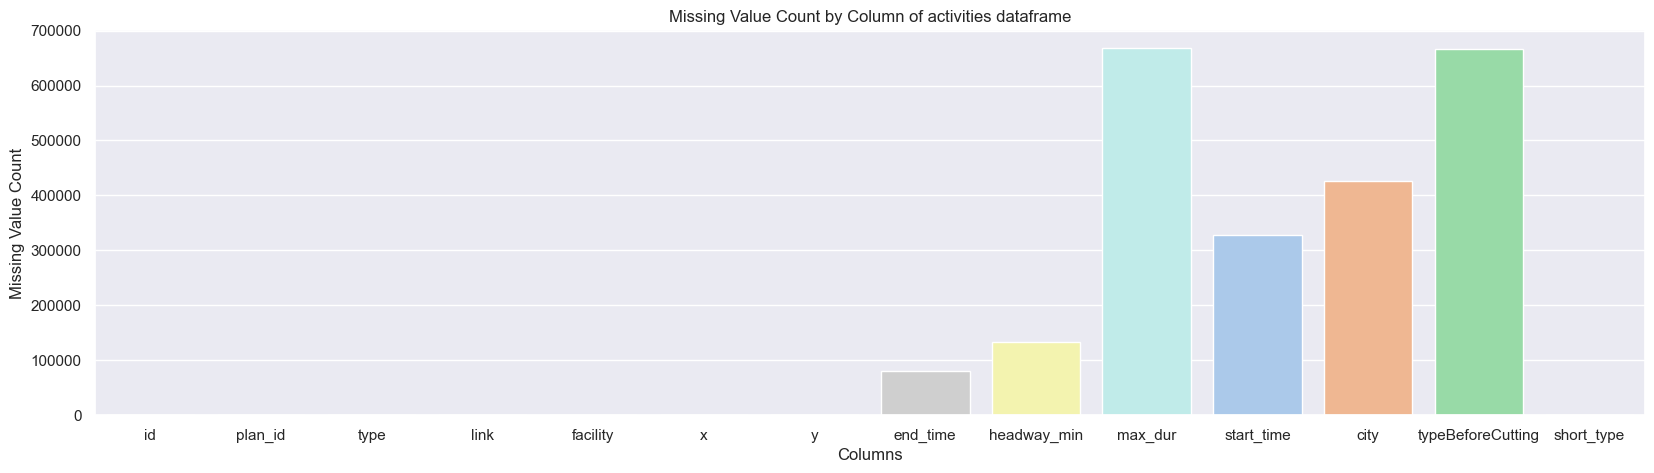

In [92]:
# Plot of missing values of activities dataframe
missing_counts_activities = plan_df.activities.isnull().sum()

# Set the style
sns.set(style="darkgrid")

# Create a countplot to visualize missing value counts
plt.figure(figsize=(20, 5))
sns.barplot(x=missing_counts_activities.index, y=missing_counts_activities.values, palette="pastel")
plt.xlabel("Columns")
plt.ylabel("Missing Value Count")
plt.title("Missing Value Count by Column of activities dataframe")
plt.show()

In [93]:
# Unique plan_id of tyhe activities dataframe (before Dropping PT interaction and outside plans)
plan_df.activities['plan_id'].nunique()

133778

## <font color="green"> Legs Dataframe

In [94]:
# WE DON'T NEED IT BEFORE THE SIMULATION
# Shape of the legs dataframe
#plan_df.legs.shape

In [95]:
# Head of the legs dataframe
#plan_df.legs.head()

## <font color="green"> Persons Dataframe

In [96]:
# Shape of persons dataframe
plan_df.persons.shape

(133778, 22)

C:\Users\muaa\AppData\Local\Temp\ipykernel_22128\1571534594.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts_persons.index, y=missing_counts_persons.values, palette="pastel")


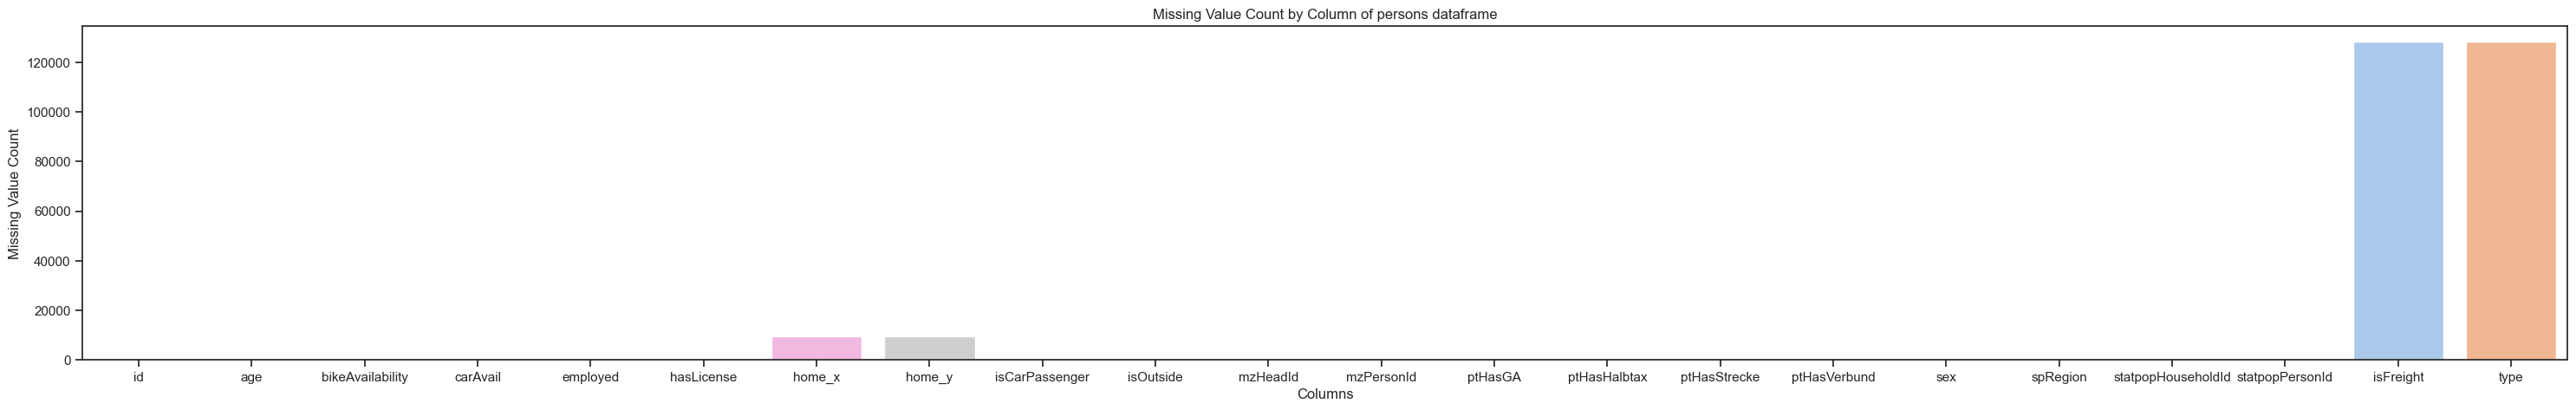

In [99]:
# Plot of missing values of persons dataframe
missing_counts_persons = plan_df.persons.isnull().sum()

# Set the style
sns.set(style="ticks")

# Create a countplot to visualize missing value counts
plt.figure(figsize=(37, 5))
sns.barplot(x=missing_counts_persons.index, y=missing_counts_persons.values, palette="pastel")
plt.xlabel("Columns")
plt.ylabel("Missing Value Count")
plt.title("Missing Value Count by Column of persons dataframe")
plt.show()

In [100]:
# Drop rows with missin values of age columns in persons dataframe
plan_df.persons.dropna(subset=['age'], inplace=True)

In [120]:
# Drop persons with lower than 6 years old from persons dataframe and plot again age distribution
plan_df.persons['age'] = plan_df.persons['age'].astype(int)
plan_df.persons = plan_df.persons[plan_df.persons['age'] >= 6]

In [121]:
# Shape of dropped datafarme
plan_df.persons.shape

(123838, 22)

In [122]:
# Head of dropped persons dataframe
plan_df.persons.head()

,id,age,bikeAvailability,carAvail,employed,hasLicense,home_x,home_y,isCarPassenger,isOutside,mzHeadId,mzPersonId,ptHasGA,ptHasHalbtax,ptHasStrecke,ptHasVerbund,sex,spRegion,statpopHouseholdId,statpopPersonId,isFreight,type
0,10,30,FOR_SOME,never,true,no,2679482.0,1237545.0,false,true,374775,281604,true,false,false,false,f,1,201200010000137,201240012081086,NaN,NaN
2,1000,48,FOR_SOME,never,true,yes,2678966.0,1235785.0,false,true,137604,496052,false,false,false,false,f,1,201200010000745,201240009138483,NaN,NaN
3,1000157,52,FOR_ALL,always,true,yes,2695732.0,1259962.0,false,true,275258,212563,false,false,false,true,f,1,201202300043212,201240010759877,NaN,NaN
4,1000183,32,FOR_ALL,always,true,yes,2696352.0,1261689.0,false,true,410086,130607,false,true,false,false,f,1,201202300041144,201240010762942,NaN,NaN
5,1000184,32,FOR_ALL,never,true,yes,2696352.0,1261689.0,true,true,410086,328565,true,false,false,false,m,1,201202300041144,201240014545573,NaN,NaN


In [123]:
# Value counts of spRegion of persons dataframe
plan_df.persons['spRegion'].value_counts()

spRegion
1    102115
3     17925
2      3798
Name: count, dtype: int64

In [124]:
plan_df.persons.isnull().sum()

id                         0
age                        0
bikeAvailability           0
carAvail                   0
employed                   0
hasLicense                 0
home_x                  4988
home_y                  4988
isCarPassenger             0
isOutside                  0
mzHeadId                   0
mzPersonId                 0
ptHasGA                    0
ptHasHalbtax               0
ptHasStrecke               0
ptHasVerbund               0
sex                        0
spRegion                   0
statpopHouseholdId         0
statpopPersonId            0
isFreight             123838
type                  123838
dtype: int64

In [125]:
plan_df.persons.shape

(123838, 22)

## <font color="green"> Plan Dataframe

In [107]:
# Shape of plans dataframe
plan_df.plans.shape

(133778, 3)

In [108]:
# Head of plans dataframe
plan_df.plans.head()

,id,person_id,selected
0,1,10,yes
1,2,100,yes
2,3,1000,yes
3,4,1000157,yes
4,5,1000183,yes


In [109]:
# Missing values of plans dataframe
plan_df.plans.isnull().sum()

id           0
person_id    0
selected     0
dtype: int64

In [110]:
# Unique value of selected column of plans dataframe
plan_df.plans['selected'].value_counts()

selected
yes    133778
Name: count, dtype: int64

## <font color="green"> Routes Dataframe

In [111]:
# Shape of the routes dataframe
plan_df.routes.shape

(722610, 9)

In [112]:
# Head of the routes dataframe
plan_df.routes.head()

,id,leg_id,value,type,start_link,end_link,trav_time,distance,vehicleRefId
0,1,1,None,generic,270549,617713,00:03:20,239.83275324790645,NaN
1,2,3,None,generic,586404,4222,00:00:59,71.92245024668337,NaN
2,3,5,None,generic,955504,955475,00:00:00,0.0,NaN
3,4,7,None,generic,771011,166874,00:00:26,30.317917906969893,NaN
4,5,8,None,generic,166874,166874,00:00:00,0.0,NaN


In [113]:
# # Plot of missing values of routes dataframe
# missing_counts_routes = plan_df.routes.isnull().sum()

# # Set the style
# sns.set(style="darkgrid")

# # Create a countplot to visualize missing value counts
# plt.figure(figsize=(10, 4))
# sns.barplot(x=missing_counts_routes.index, y=missing_counts_routes.values, palette="pastel")
# plt.xlabel("Columns")
# plt.ylabel("Missing Value Count")
# plt.title("Missing Value Count by Column of routes dataframe")
# plt.show()

In [114]:
## <font color="green"> SAVE CSV FILES

In [126]:
plan_df.activities.to_csv("./processedCSVs/SynPop_activities.csv", index=False)
plan_df.persons.to_csv("./processedCSVs/SynPop_persons.csv", index=False)